<h1 style="color:red;">Week 3</h1>

This week we will adapt the linear regression model using only the pytorch module

In [1]:
import torch
import torch.nn as nn # this is the neural network module from pytorch

#Define the input variables x's and y's 
x=torch.tensor([[1],[2],[3],[4]], dtype=torch.float32)
y_actual=torch.tensor([[2],[4],[6],[8]], dtype=torch.float32)

#define the test variable
x_test=torch.tensor([5], dtype=torch.float32)


#Get the number of samples(row) amd features (columns)
n_sample, n_features =x.shape
print(n_sample, n_features)


4 1


In [2]:
#define the input and output size
input_size=n_features
output_size=1

#Define linear regression model using single linear layer
class LinearRegression(nn.Module):

    def __init__(self, input_size, output_size):
        super(LinearRegression,self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, output_size, bias=False)
        )

    def forward(self, x):
        return self.model(x)
    
model=LinearRegression(input_size, output_size)

print(f'Prediction before training: f(5)={model(x_test).item():.3f}')

Prediction before training: f(5)=0.362


# Linear Regression Model

- **Linear Layer**: 
    - The `nn.Linear(input_size, output_size)` creates a single layer where the model learns the weights and bias.
    - The formula for the linear regression model is \( y = w * x + b \), where `w` is the weight and `b` is the bias.
  
- **`nn.Sequential`**: 
    - This is a container used to organize layers.
    - In this model, it's used to encapsulate the linear layer. Although not strictly necessary for a single layer, it allows for easy expansion if you want to add more layers in the future.

- **`forward` method**: 
    - Defines how input data (`x`) is passed through the model.
    - The `forward` method is invoked when making predictions, passing the input data through the linear layer.

- **Model Structure**:
    - The model consists of a single layer defined using `nn.Linear`.
    - The model is trained by adjusting the weights and bias to minimize the error between predicted and actual values.


In [3]:
# Training process for the linear regression model

# Set learning rate (step size) and number of iterations (epochs)
learning_rate = 0.01   # Controls how much to adjust the model with each step
iteration = 70       # Number of passes over the dataset

# Define the loss function
# nn.MSELoss() computes the Mean Squared Error, commonly used for regression tasks
loss = nn.MSELoss()

# Define the optimizer
# SGD stands for Stochastic Gradient Descent, which updates model parameters to minimize the loss
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#save the loss value per epoch for plotting
loss_value=[]
weight=[]
true_weight=2

# Training loop
for epoch in range(iteration):
    # Forward pass: compute the predicted outputs (y_pred) based on the current model parameters
    y_pred = model(x)
    
    # Compute the loss: difference between predicted (y_pred) and actual (y_actual) outputs
    l = loss(y_actual, y_pred)
    loss_value.append(l.item())
    
    # Backward pass: compute gradients of the loss with respect to model parameters
    l.backward()  # This computes the gradients of the loss function (dl/dw)

    # Update the model parameters using the computed gradients
    optimizer.step()  # Adjusts the weights (and bias) based on the gradients

    # Zero out the gradients to prevent accumulation
    optimizer.zero_grad()

    # Extract the weight (w) from the model's parameters and print it along with the loss
    [w] = model.parameters()
    weight.append(w.item())
    #if you have bias term then you need to put both, i.e. [w,b] = model.parameters()
    
    # Print progress every 2 iterations (epochs)
    if epoch % 2 == 0:
        print(f'Epoch {epoch + 1}: w = {w.item():.3f}, loss = {l:.6f}')

# After training, make a prediction using the trained model
# Here, we predict the output for x_test = 5

Prediction=model(x_test).item()
print(f'Prediction after training for {iteration} epochs : f(5) = {Prediction:.3f}')


Epoch 1: w = 0.362, loss = 27.865692
Epoch 3: w = 0.816, loss = 14.546064
Epoch 5: w = 1.145, loss = 7.593137
Epoch 7: w = 1.382, loss = 3.963665
Epoch 9: w = 1.554, loss = 2.069058
Epoch 11: w = 1.677, loss = 1.080061
Epoch 13: w = 1.767, loss = 0.563799
Epoch 15: w = 1.832, loss = 0.294306
Epoch 17: w = 1.878, loss = 0.153630
Epoch 19: w = 1.912, loss = 0.080196
Epoch 21: w = 1.936, loss = 0.041863
Epoch 23: w = 1.954, loss = 0.021853
Epoch 25: w = 1.967, loss = 0.011407
Epoch 27: w = 1.976, loss = 0.005955
Epoch 29: w = 1.983, loss = 0.003108
Epoch 31: w = 1.987, loss = 0.001623
Epoch 33: w = 1.991, loss = 0.000847
Epoch 35: w = 1.993, loss = 0.000442
Epoch 37: w = 1.995, loss = 0.000231
Epoch 39: w = 1.997, loss = 0.000120
Epoch 41: w = 1.998, loss = 0.000063
Epoch 43: w = 1.998, loss = 0.000033
Epoch 45: w = 1.999, loss = 0.000017
Epoch 47: w = 1.999, loss = 0.000009
Epoch 49: w = 1.999, loss = 0.000005
Epoch 51: w = 2.000, loss = 0.000002
Epoch 53: w = 2.000, loss = 0.000001
Epoc

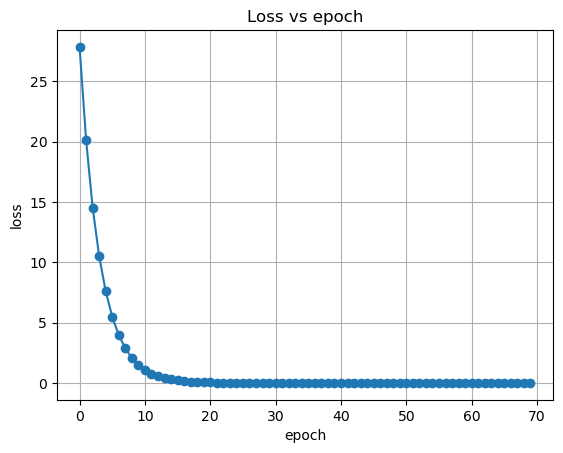

In [4]:
#plot the loss value per epoch using matplotlib

import numpy as np 
import matplotlib.pyplot as plt


plt.plot(loss_value, marker='o')
plt.title('Loss vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

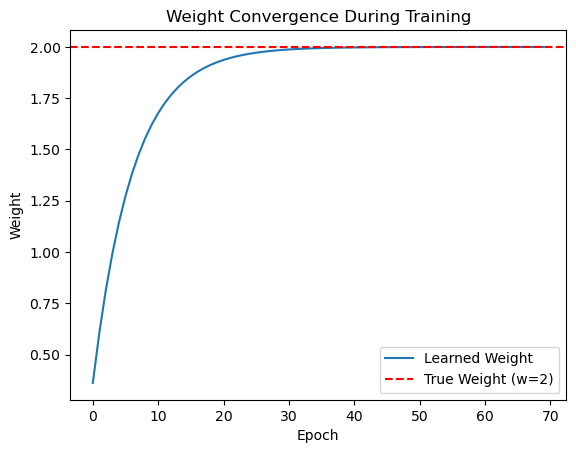

In [5]:
#plot the weight

plt.plot(weight, label='Learned Weight')
plt.axhline(y=true_weight, color='r', linestyle='--', label='True Weight (w=2)')
plt.xlabel('Epoch')
plt.ylabel('Weight')
plt.title('Weight Convergence During Training')
plt.legend()
plt.show()

## Homework #3: Linear Regression with Bias

### Objective

In previous exercises, we assumed that the linear regression model had no bias term (i.e., `b = 0`, `y = w * x`). However, in real-world scenarios, a bias term `b` is often present (i.e., `y_actual = true_weight * x + b`). 

In this assignment, you will create a training dataset that includes a bias term and train a linear regression model to learn this bias.

### Instructions

1. **Create a Training Dataset**:
   - Generate a dataset with 20 samples.
   - Set the bias `b = 5` and the true weight `true_weight = 7`.
   - Use the formula to calculate `y_actual`:
     ```
     y_actual = true_weight * x + b
     ```

2. **Train the Linear Regression Model**:
   - Implement and train a linear regression model with bias using PyTorch.
   - Choose an appropriate number of iterations to train the model effectively.

3. **Plot Results**:
   - **Loss vs Epoch**: Plot the loss over epochs to observe how the model's loss decreases during training.
   - **Weight vs Epoch**: Plot the learned weight over epochs. Include a horizontal line representing the true weight for comparison.
   - **Bias vs Epoch**: Plot the learned bias over epochs. Include a horizontal line representing the true bias for comparison.

4. **Test the Model**:
   - After training, evaluate the model with 5 randomly chosen test values that are not part of the training dataset.
   - Print the predictions for these test values.

### Deliverables

- **Code**: Implement the model training and evaluation in Python using PyTorch. Submit in a similar format as hw1. 
- **Plots**: Provide plots for Loss vs Epoch, Weight vs Epoch (with true value line), and Bias vs Epoch (with true value line).
- **Results**: Print the predictions for the 5 test values.

### Notes

- Adjust the learning rate and number of iterations if needed based on the training process.
- Ensure that your plots clearly show the convergence of the weight and bias to their true values.

<span style="color:red">This will be due on 22nd of september 11:59 pm
